# 8章

In [21]:
# minimal imports
import pandas as pd
import numpy as np
from plotnine import *
import plotnine.options as p9options

# for graphical enhancement
from mizani.labels import label_date, label_dollar, label_percent, label_comma
from pysocviz.properties import dcolors
from pysocviz.p9extra import geom_text_repel
from pysocviz.p9extra import theme_wsj, theme_economist

p9options.figure_size = (5.4, 4.8)
theme_set(theme_minimal(base_family='Noto Sans CJK JP'))

In [22]:
# dataset packages
from pysocviz.loader import load_dataset
from gapminder import gapminder

asasec = load_dataset('asasec')
organdata = load_dataset('organdata')
county_data = load_dataset('county_data')
gss_lon = load_dataset('gss_lon')
fredts = load_dataset('fredts')
yahoo = load_dataset('yahoo')
studebt = load_dataset('studebt')

## 図 8.1

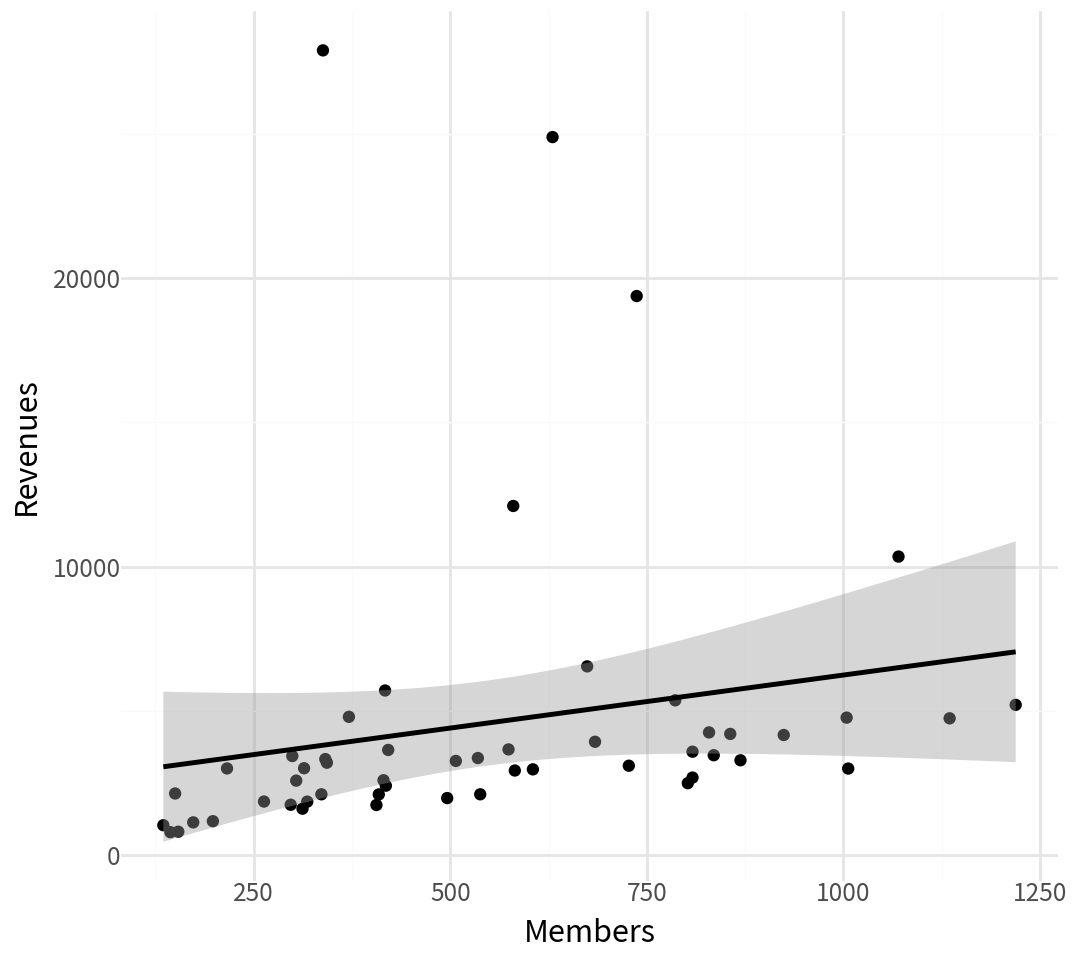

In [23]:
p = ggplot(
  asasec.loc[lambda d: d['Year'] == 2014],
  aes(x='Members', y='Revenues', label='Sname')
)
p + geom_point() + geom_smooth(method='lm')

## 図 8.2

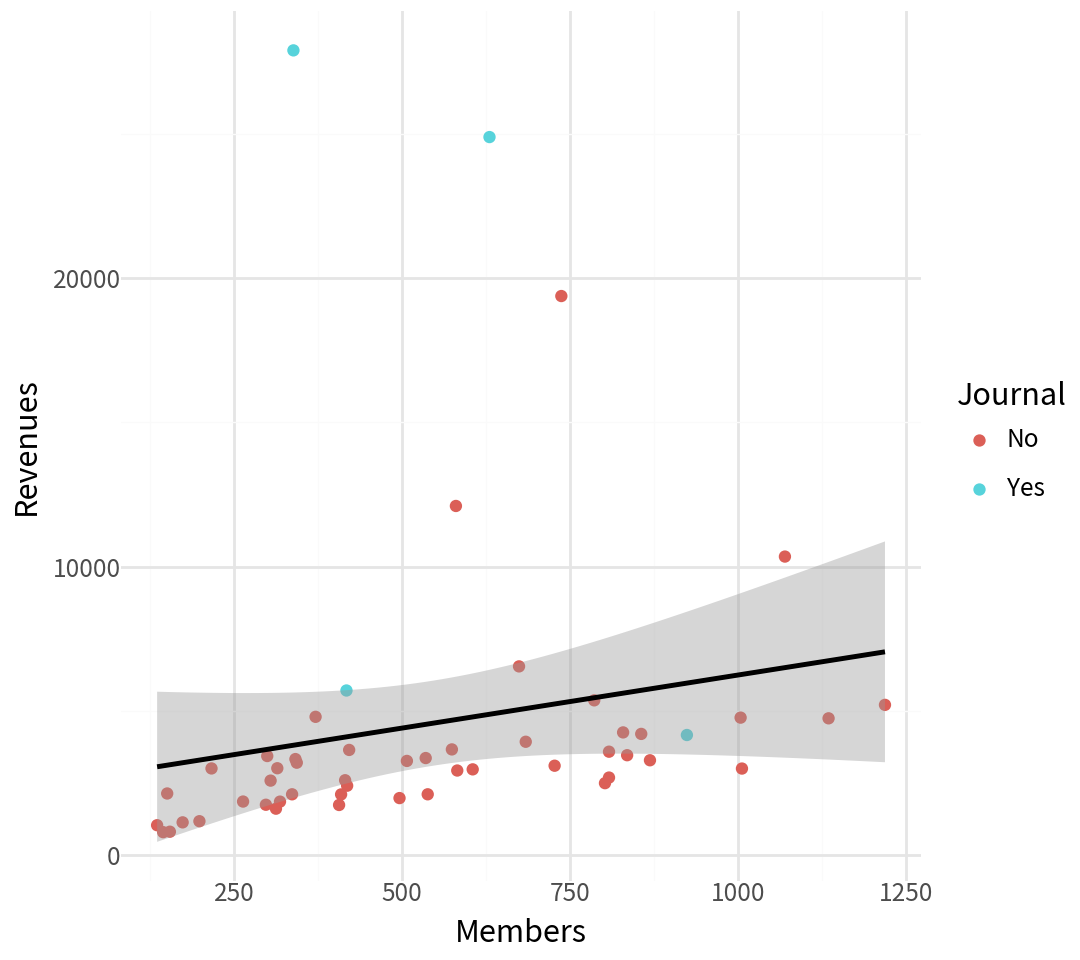

In [24]:
p = ggplot(
  asasec.loc[lambda d: d['Year'] == 2014],
  aes(x='Members', y='Revenues', label='Sname')
)
p + geom_point(aes(color='Journal')) + geom_smooth(method="lm")

## 図 8.3

注: 凡例の位置を調整した場合, タイトルや軸ラベルと重なることがよくあります. このような場合, `legend_position`, `legend_direction`, `subplot_adjust` themeables を手動調整する必要があります. `legend_position` には以下のように座標をタプルで与えられることを覚えてください.

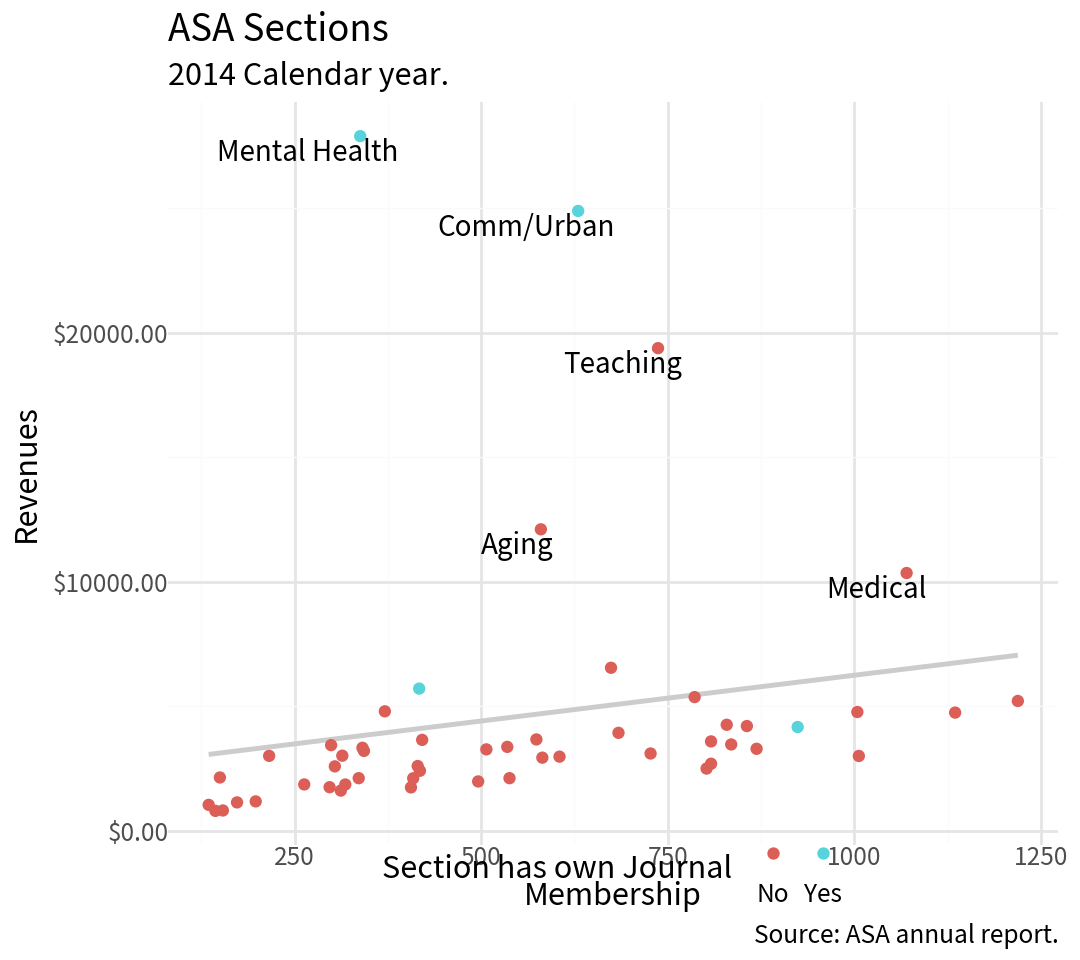

In [25]:
p0 = ggplot(
  asasec.loc[lambda d: d['Year'] == 2014],
  aes(x='Members', y='Revenues', label='Sname')
)

p1 = p0 + geom_smooth(
  method="lm",
  se=False, color=dcolors["gray80"]
) + geom_point(aes(color='Journal')) 
p2 = p1 + geom_text(
  data=asasec.loc[lambda d: (d['Year'] == 2014) & (d['Revenues'] > 7000)],
  size=10, adjust_text={'arrowprops': {'arrowstyle': '-'}}
)
p3 = p2 + labs(
  x="Membership",
  y="Revenues",
  color="Section has own Journal",
  title="ASA Sections",
  subtitle="2014 Calendar year.",
  caption="Source: ASA annual report.")

p4 = p3 + scale_y_continuous(
  labels=label_dollar()
) + theme(
    legend_position=(.5, -.1),
    legend_direction='horizontal'
)
p4

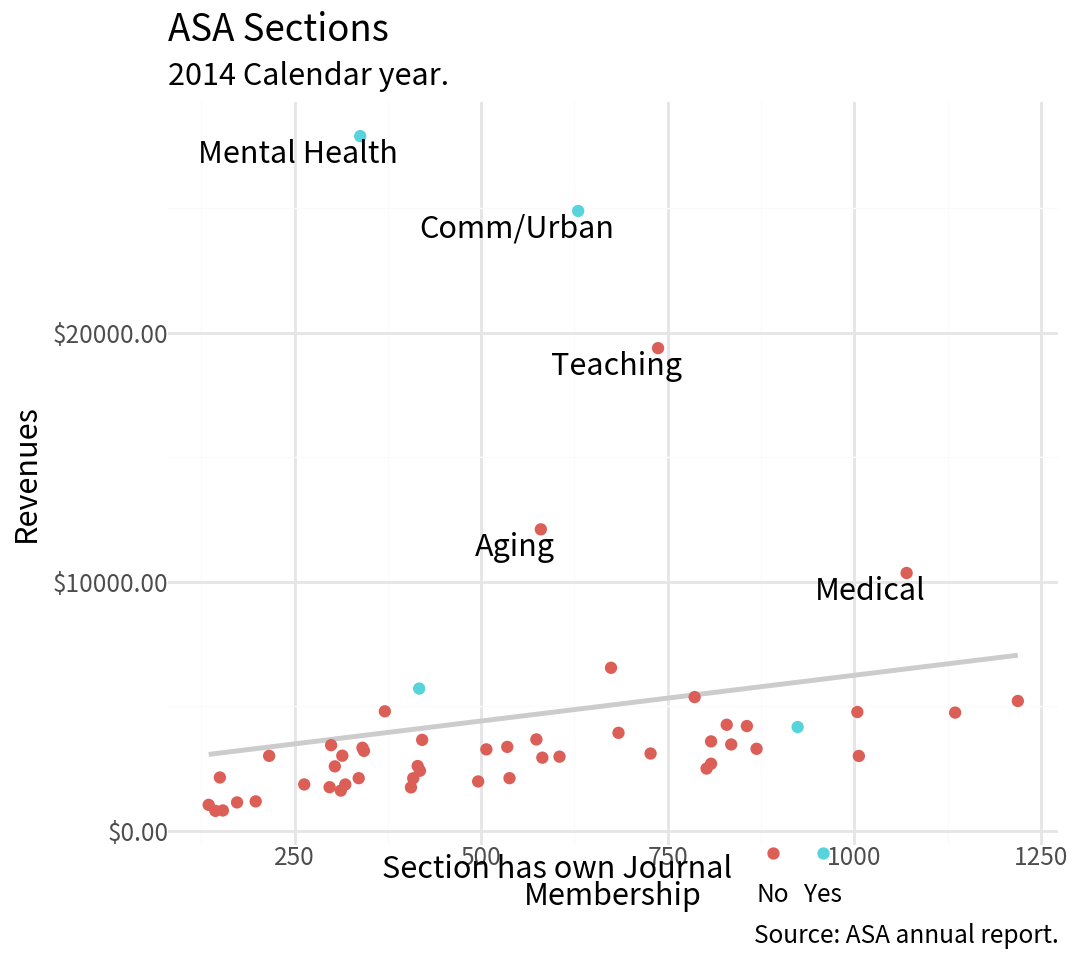

In [26]:
p2 = p1 + geom_text_repel(
    arrowstyle=None,
    data=asasec.loc[lambda d: (d['Year'] == 2014) & (d['Revenues'] > 7000)]
)
p3 = p2 + labs(
    x="Membership",
    y="Revenues",
    color="Section has own Journal",
    title="ASA Sections",
    subtitle="2014 Calendar year.",
    caption="Source: ASA annual report.")

p4 = p3 + scale_y_continuous(
    labels=label_dollar()
) + theme(
    legend_position=(.5, -.1),
    legend_direction='horizontal'
)
p4

## Figure 8.7

注: 離散カラーマッピングに対し得ては, `scale_color_brewer('qualitative', PALETTE_NAME)` の `scale_color_cmap_d(PALETTE_NAME)` どちらかを使えます. 後者がよりシンプルです.

In [27]:
p = ggplot(organdata, aes(x='roads', y='donors', color='world'))
(
  p + geom_point(size=2) + scale_color_brewer('qual', "Set2"
  ) + theme(legend_position="top")
).draw();
(
  p + geom_point(size=2) + scale_color_cmap_d("Pastel2"
  ) + theme(legend_position="top")
).draw();
(
  p + geom_point(size=2) + scale_color_cmap_d("Dark2"
  ) + theme(legend_position="top")
).draw();

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 34 rows containing missing values.
/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 34 rows containing missing values.
/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


## 図 8.8

注 1: これは `scale_color_manual` のよい使用例だとは思えません. 詳細は 図 5.26 とかを見てください. 

注 2: ここでも凡例の位置を手動調整する必要がありました.

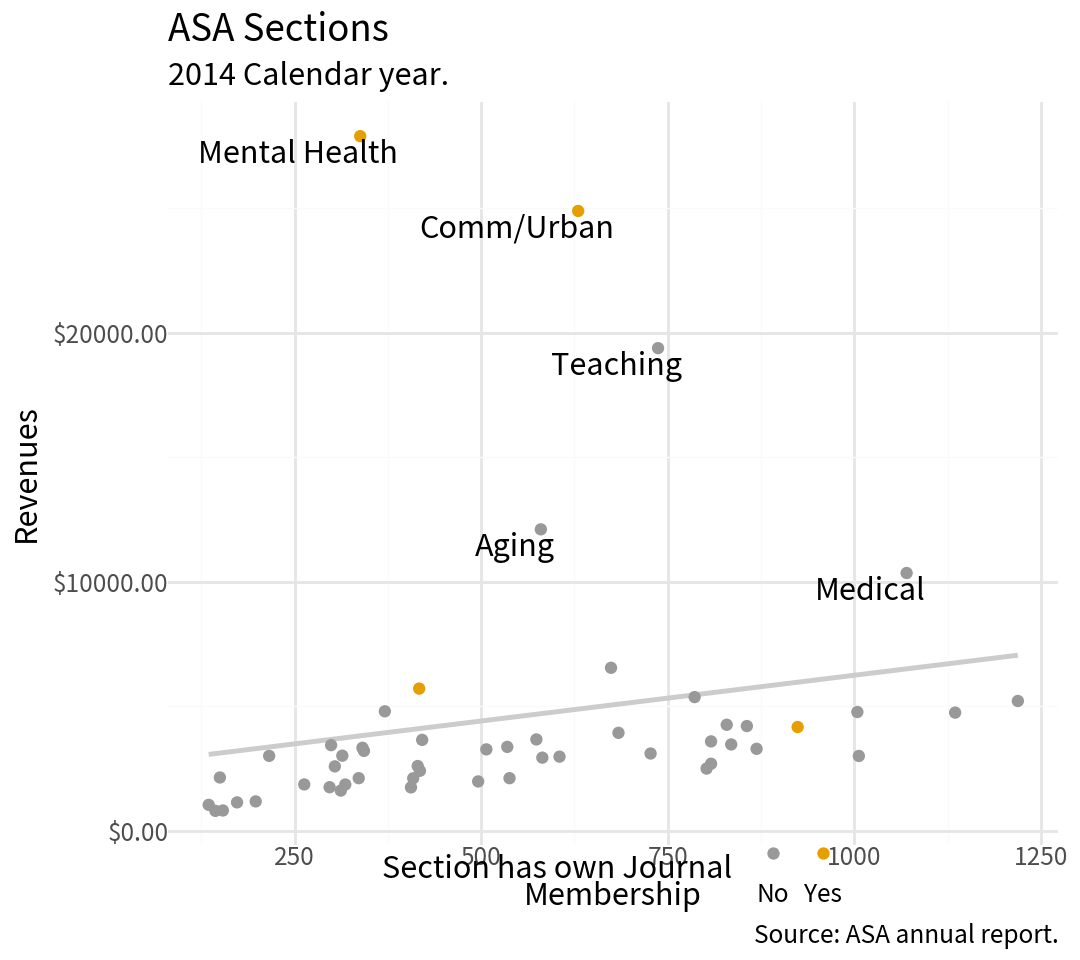

In [28]:
cb_palette = ["#999999", "#E69F00", "#56B4E9", "#009E73",
              "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
p4 + scale_color_manual(values=cb_palette) + theme(
    legend_position=(.5, -.1)
)

## 図 8.10

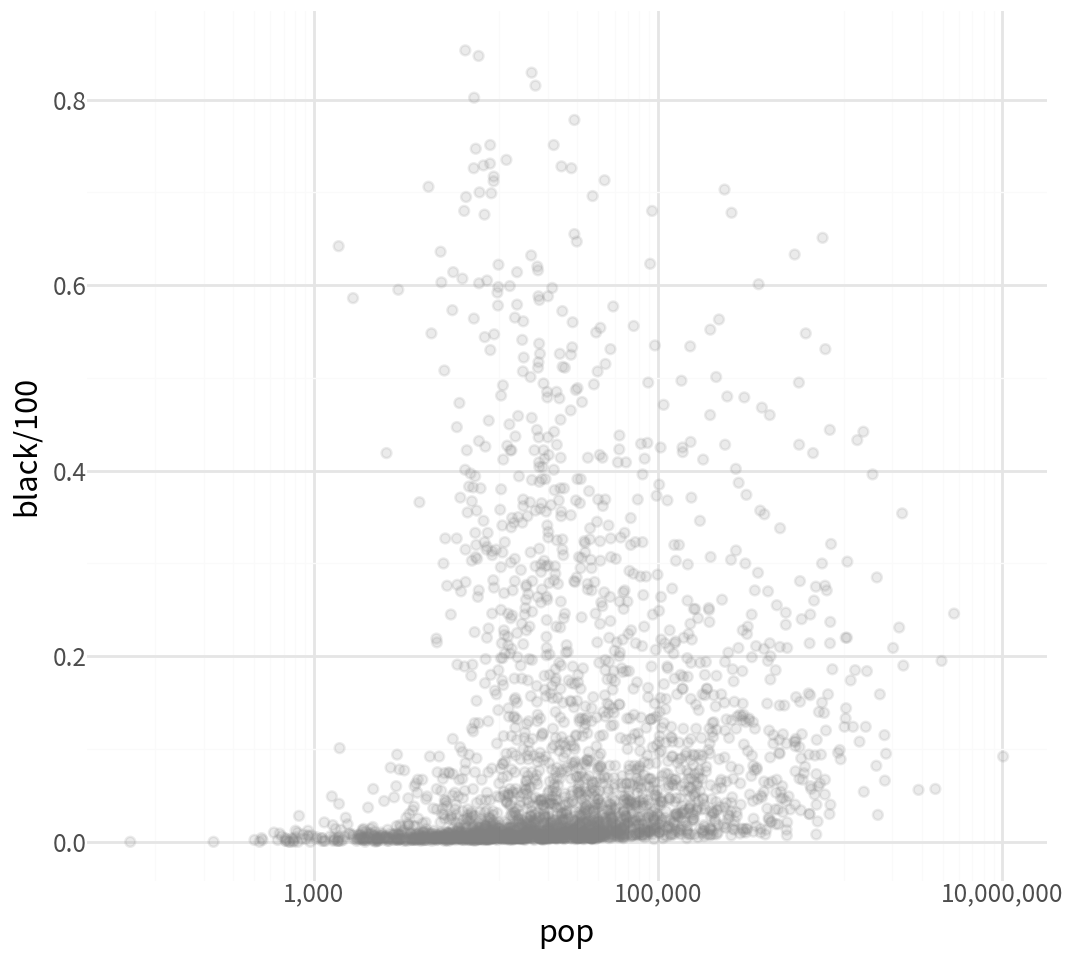

In [29]:
p0 = ggplot(
  county_data.loc[lambda d: d['flipped']=='No'],
  aes(x='pop', y='black/100')
)

p1 = p0 + geom_point(
  alpha=0.15, color=dcolors["gray50"]
) + scale_x_log10(labels=label_comma())
p1

## 図 8.11

注: 再三にわたり言っていますが, こういう `scale_color_manual` の使い方はよくありません...

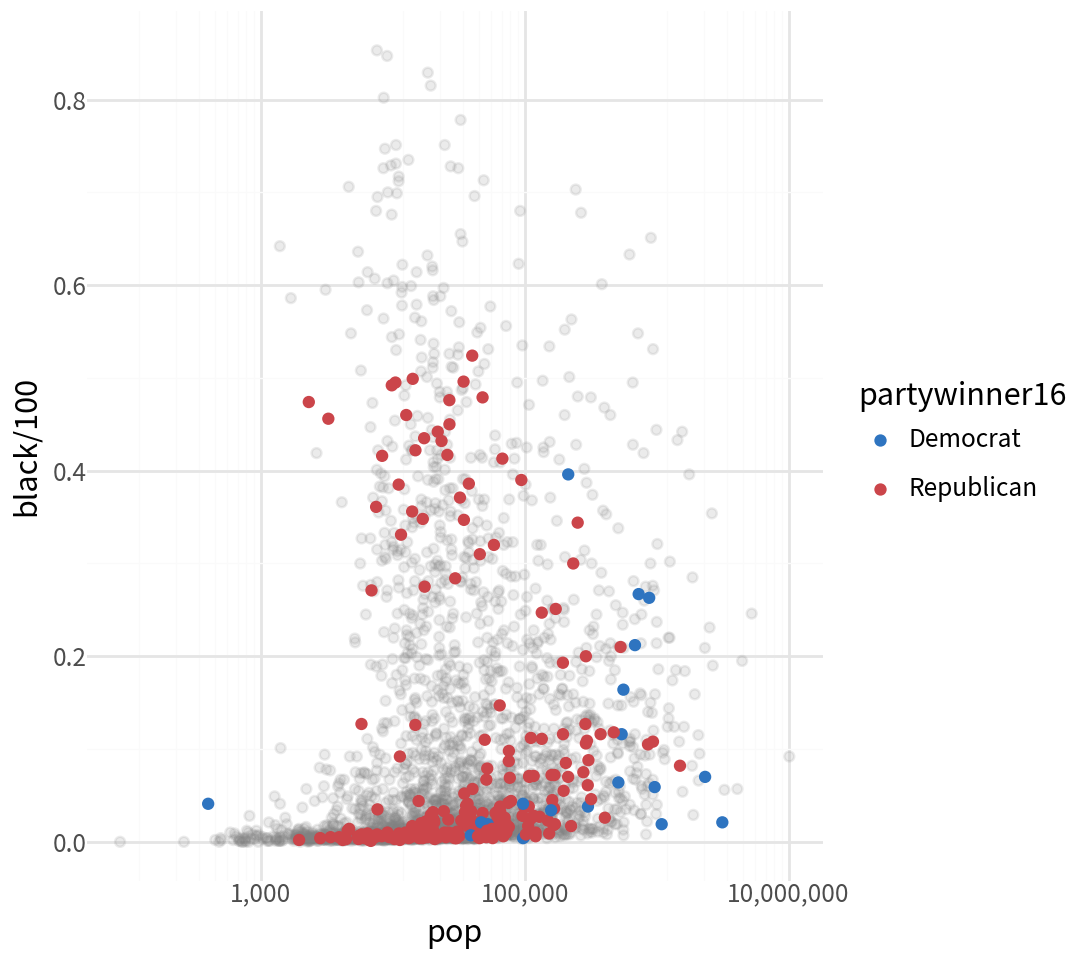

In [30]:
party_colors = ["#2E74C0", "#CB454A"]
party_colors = dict(zip(['Democrat', 'Republican'], party_colors))

p2 = p1 + geom_point(
  county_data.loc[lambda d: d['flipped']=='Yes'],
  aes(x='pop', y='black/100', color='partywinner16')
) + scale_color_manual(values=party_colors)
p2

## 図 8.12

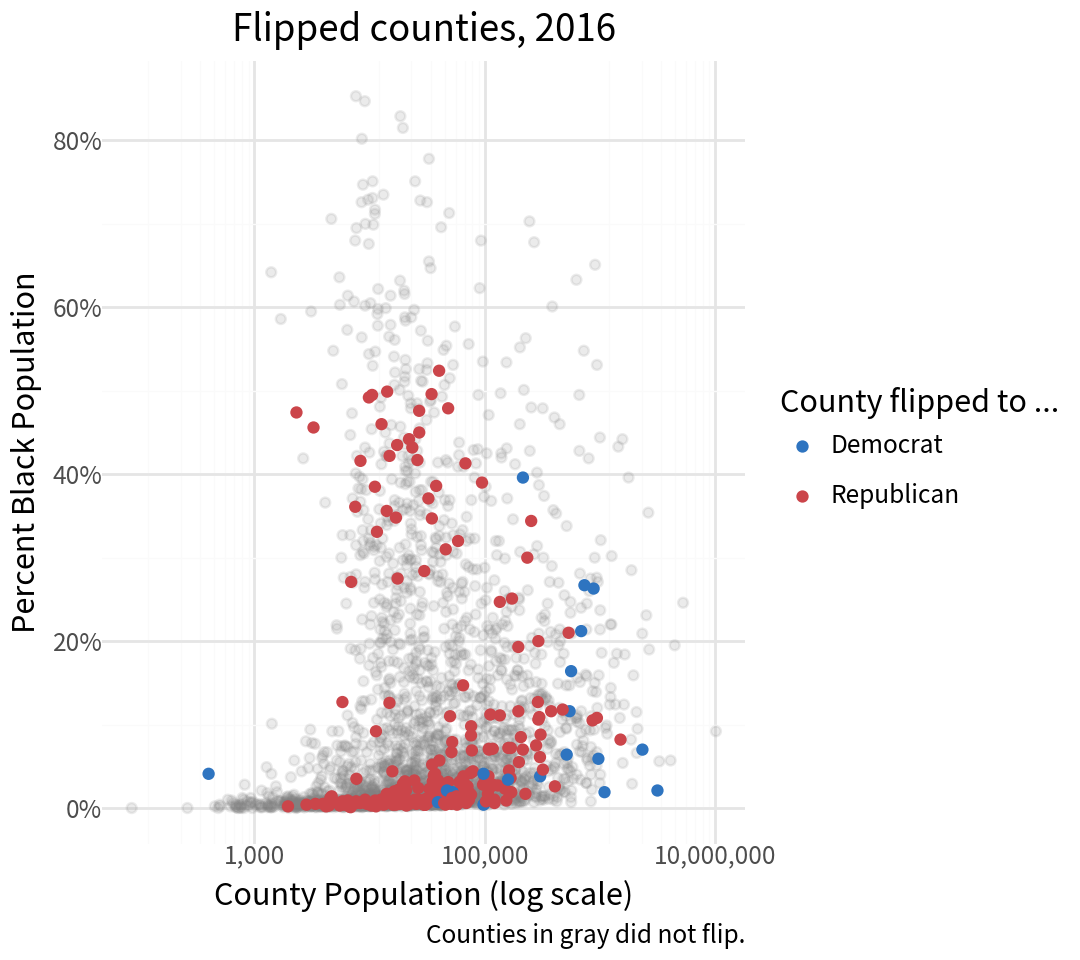

In [31]:
p3 = p2 + scale_y_continuous(labels=label_percent()) + labs(
  color="County flipped to ... ",
  x="County Population (log scale)",
  y="Percent Black Population",
  title="Flipped counties, 2016",
  caption="Counties in gray did not flip."
)
p3

## 図 8.13

注: **plotnine** は現時点 (v0.8) ではたぶん凡例を一番上に置くしかなく, タイトルより下に置くことはできません.

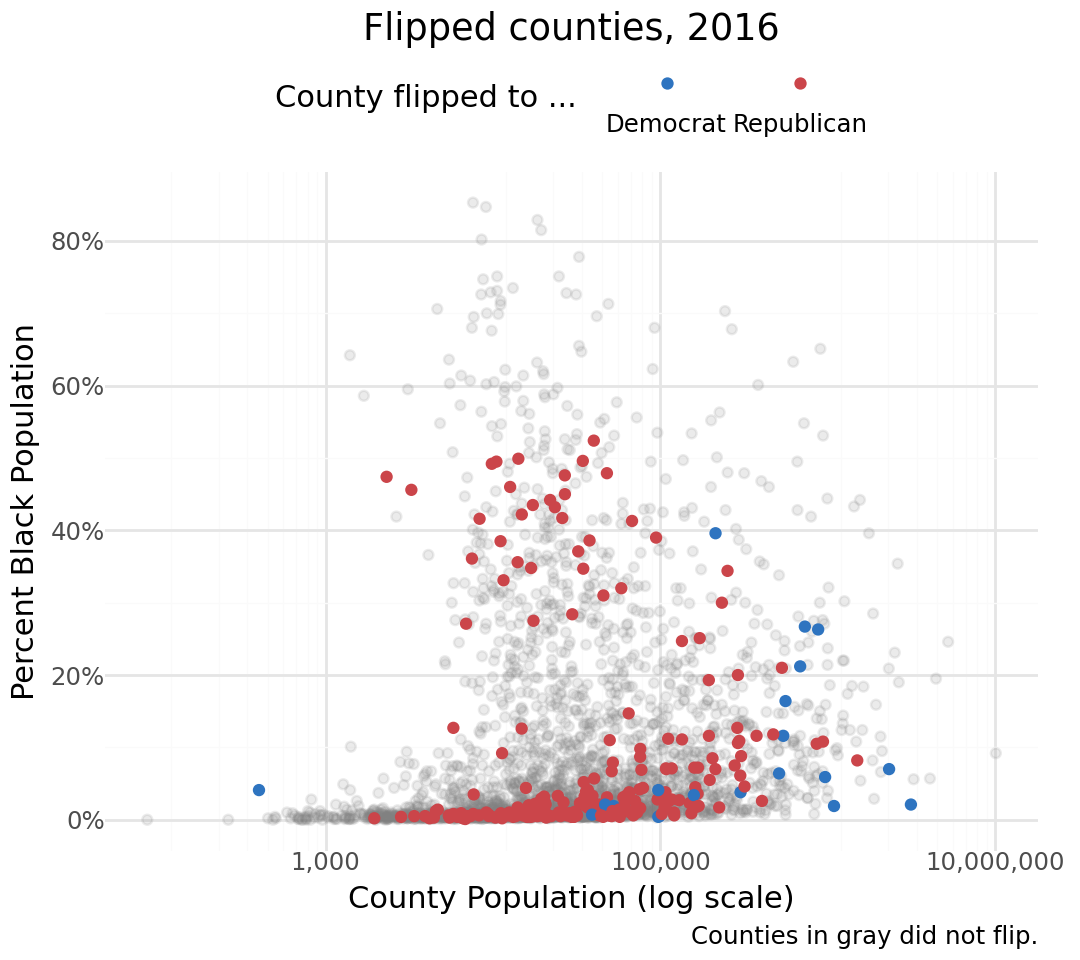

In [32]:
p4 = p3 + geom_text(
  county_data.loc[lambda d: (d['flipped']=='Yes') & d['black'] > 25 ],
  aes(x='pop', y='black/100', label='state'),
  size = 10, adjust_text={'arrowprops': {'arrowstyle': '-'}}
)
p4 + theme_minimal() + theme(
    legend_position="top"
)

## 図 8.14

注 1: 残念ながら, **plotnine** には **ggthemes** のようなテーマのプリセットはありません. そこで `theme_wsj` と `theme_economist` を私が作成しました. これらは元の関数の単なる模倣で, 機能が多少制限されています. これらは `from pysocviz.p9extra import theme_wsj, theme_economist` でインポートできます.

注 2: 残念ながら, **plotnine** には `rel` 関数のようなものはありません.

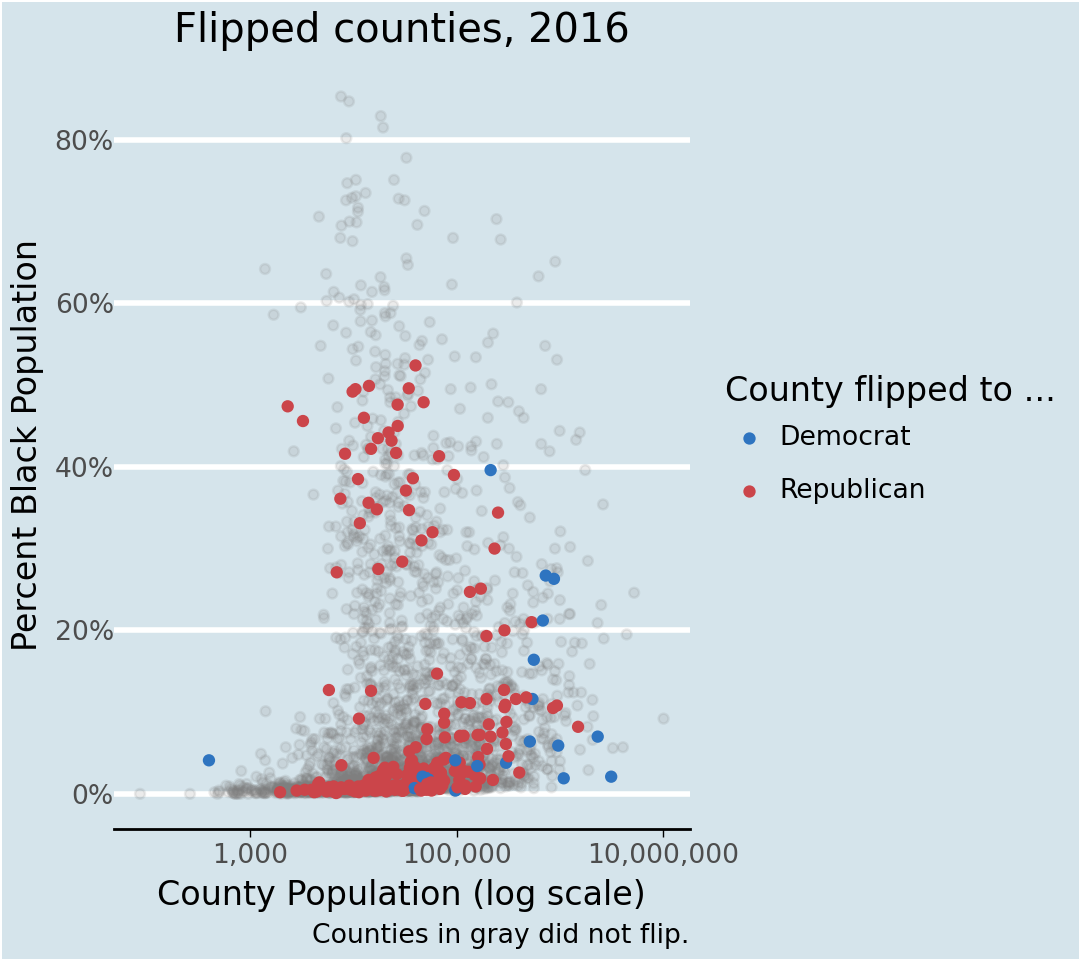

In [33]:
p4 + theme(legend_position="top")

p4 + theme(
  plot_title=element_text(size=16),
  legend_title=element_text(size=13),
  # plot_caption=element_text(size=0.35),  # not working in plotnine
  legend_position="top") + theme_economist()

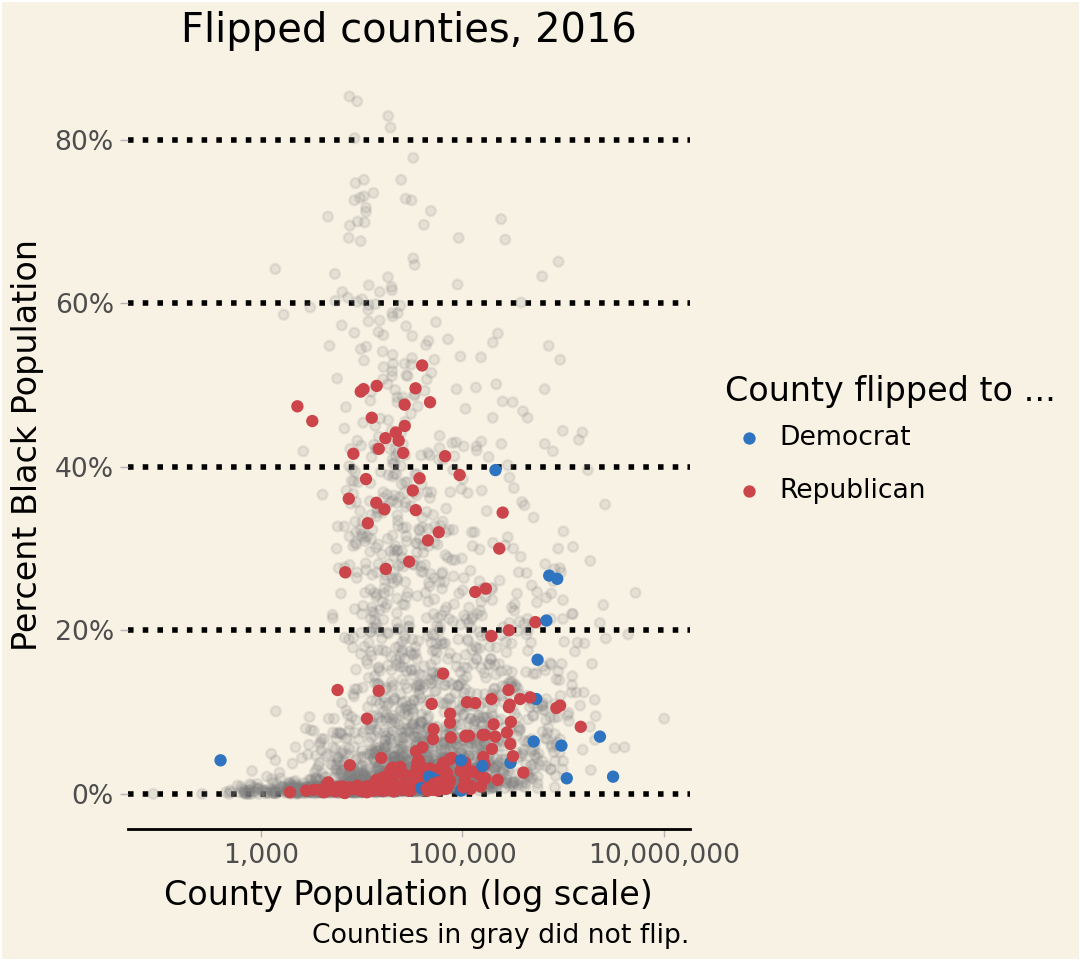

In [34]:
p4 + theme(legend_position="top")

p4 + theme(
  plot_title=element_text(size=16),
  legend_title=element_text(size=13),
  # plot_caption=element_text(size=0.35),  # not working in plotnine
  legend_position="top") + theme_wsj()

## 図 8.15

注: 私のマシンには "Courier" も "Times" インストールされていないので警告が表示されています.

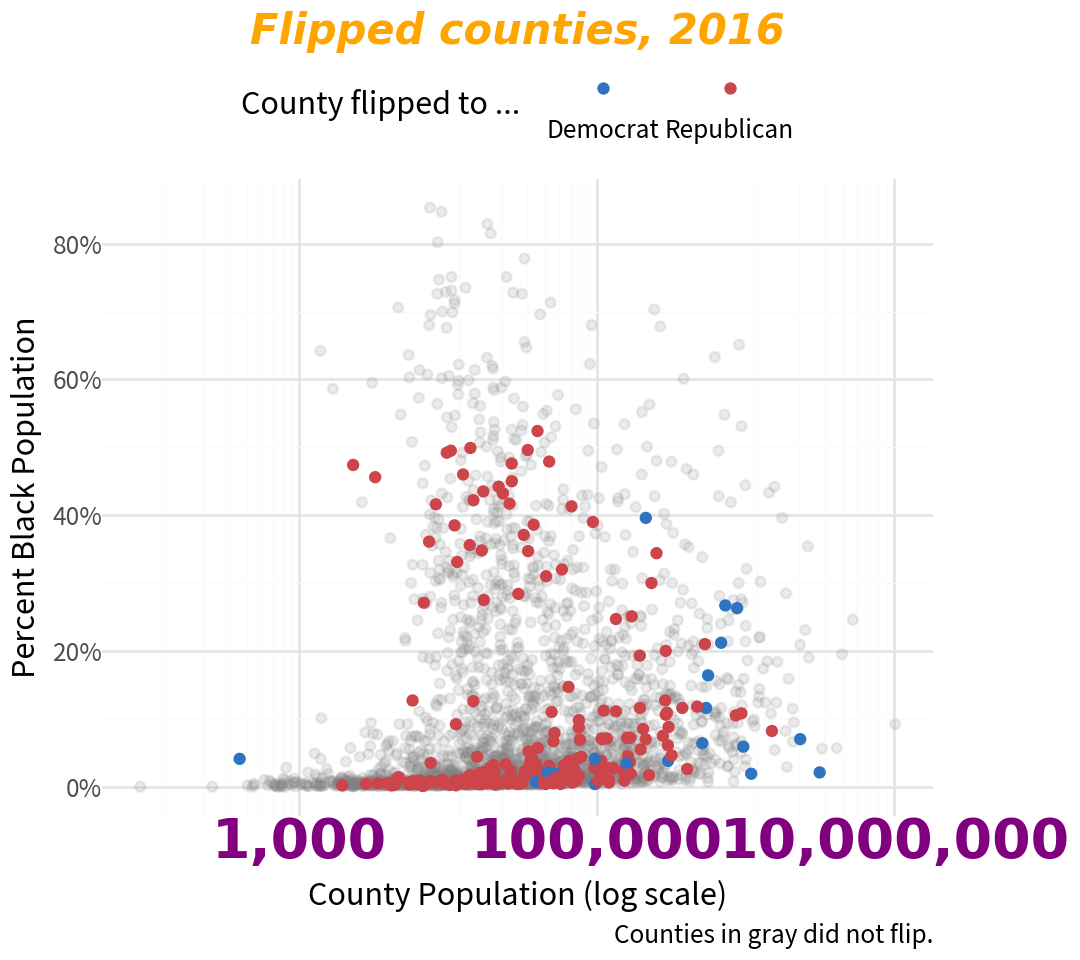

In [35]:
p4 + theme(legend_position="top")
p4 + theme(
  legend_position="top",
  plot_title=element_text(
    size=15, lineheight=.5, family="Times",
    face="bold.italic", colour="orange"
  ),
  axis_text_x = element_text(
    size=20, family="Courier", face="bold", color="purple"
  )
)

## 図 8.16

In [36]:
yrs = np.concatenate(
  [np.arange(1972, 1988, 4), [1993], np.arange(1996, 2016, 4)],
  axis=None)
mean_age = gss_lon.loc[
  lambda d: (~d['age'].isna()) & (d['year'].isin(yrs))
].groupby(
  'year').agg({'age': 'mean'}
).rename(columns={'age': 'xbar'}).assign(
    xbar=lambda d: d['xbar'].round(0)
).assign(y=0.3).reset_index()

yr_labs = pd.DataFrame({'x': 85, 'y': 0.8, 'year': yrs})

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 69 rows containing non-finite values.


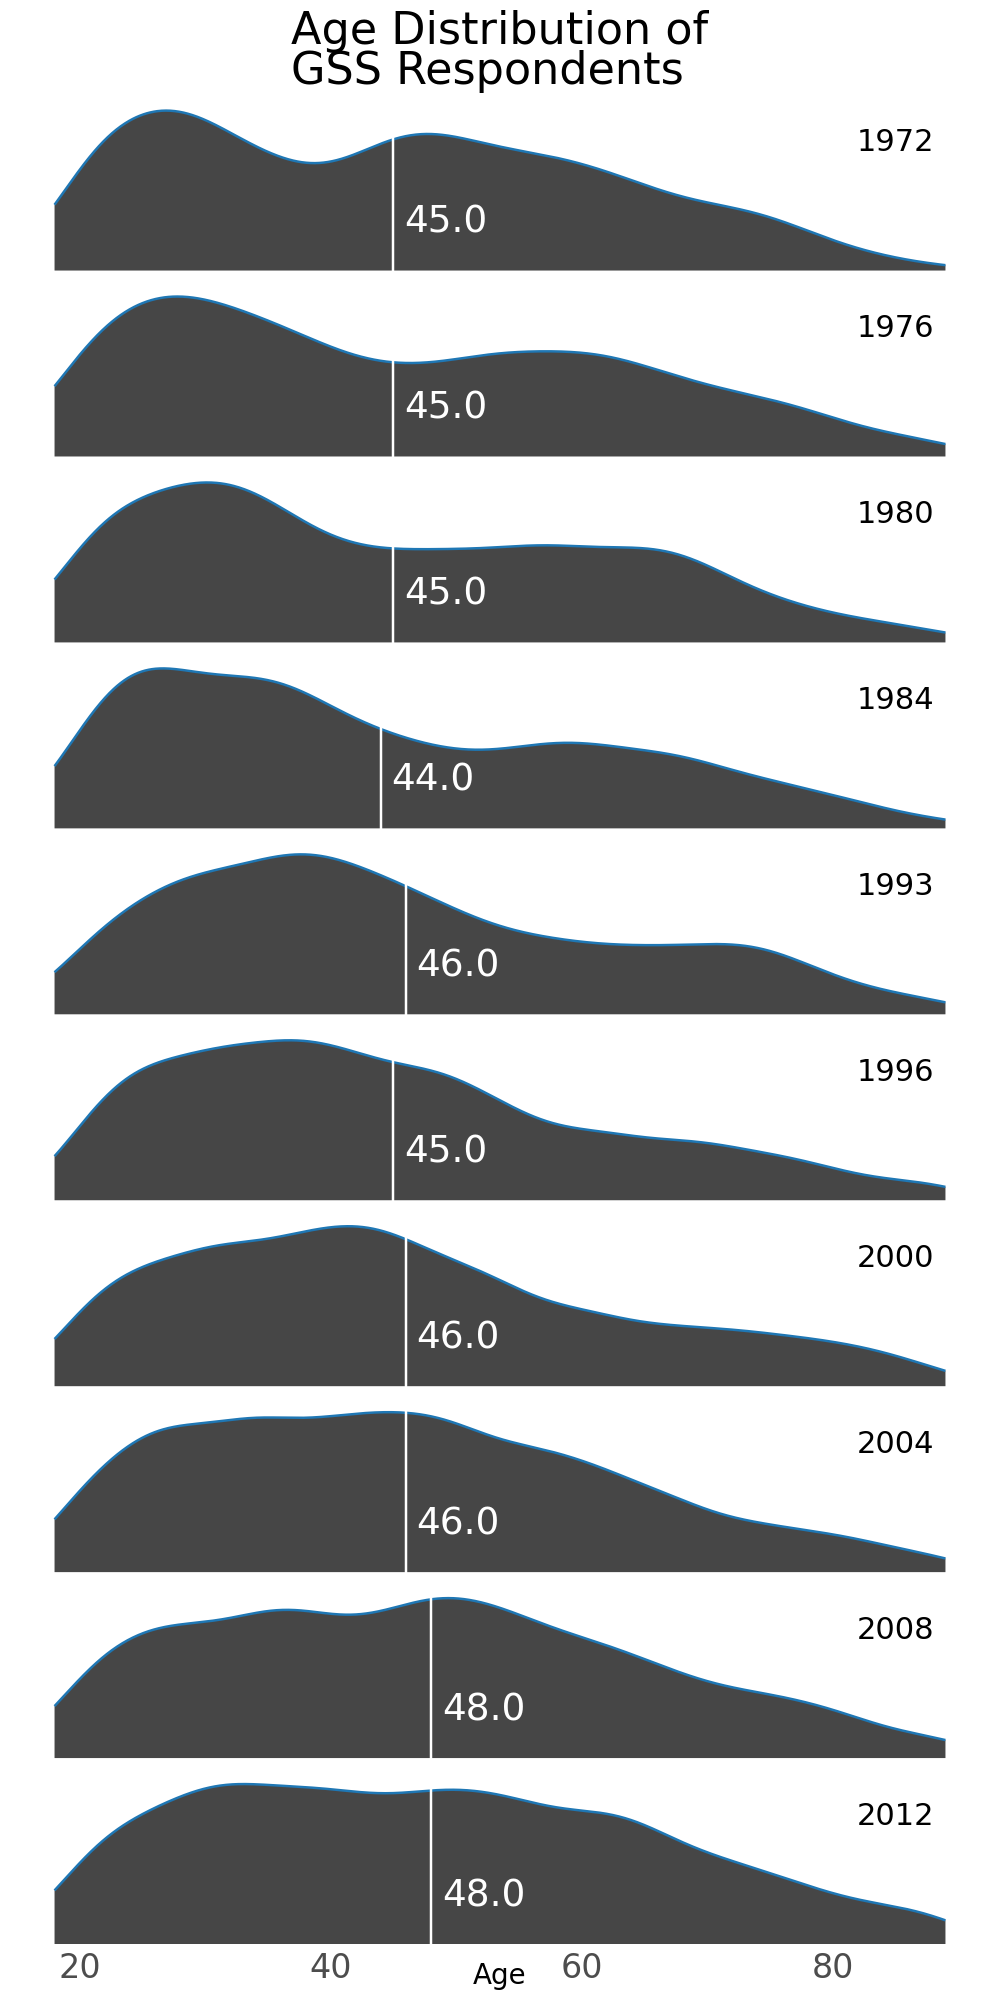

In [37]:
p = ggplot(
  gss_lon.loc[lambda d: d['year'].isin(yrs)],
  aes(x='age')
)
p1 = p + geom_density(
  aes(y='..scaled..'),
  fill=dcolors["gray20"],
  color=None,
  alpha=0.9,
) + geom_vline(
  mean_age.loc[lambda d: d['year'].isin(yrs)],
  aes(xintercept='xbar'),
  color="white", size=0.5
) + geom_text(
  mean_age.loc[lambda d: d['year'].isin(yrs)],
  aes(x='xbar', y='y', label='xbar'),
  nudge_x=7.5,
  color="white", size=13.5, ha='right'
) + geom_text(
  yr_labs.loc[lambda d: d['year'].isin(yrs)],
  aes(x='x', y='y', label='year')
) + facet_grid(rows=['year'])

p1 + theme_minimal(base_size=10) + theme(
  plot_title = element_text(size = 16),
  axis_text_x= element_text(size = 12),
  axis_title_y=element_blank(),
  axis_text_y=element_blank(),
  axis_ticks_major_y=element_blank(),
  axis_ticks_minor_y=element_blank(),
  strip_background=element_blank(),
  strip_text_y=element_blank(),
  panel_grid_major=element_blank(),
  panel_grid_minor=element_blank()
) + labs(x="Age", y=None, title="Age Distribution of\nGSS Respondents"
) + theme(figure_size=(5, 10))

## 図 8.17

注: 現時点 (v0.8) では `geom_density_ridges()` は使用できませんし, こういった画像を **plotnine** で再現するのはかなり手間がかかります. より簡単な方法の1つは **seaborn** パッケージを使用することです. 詳細は https://seaborn.pydata.org/examples/kde_ridgeplot.html を見てください.


TODO: ただしこのグラフはなぜか再現できないことがあります

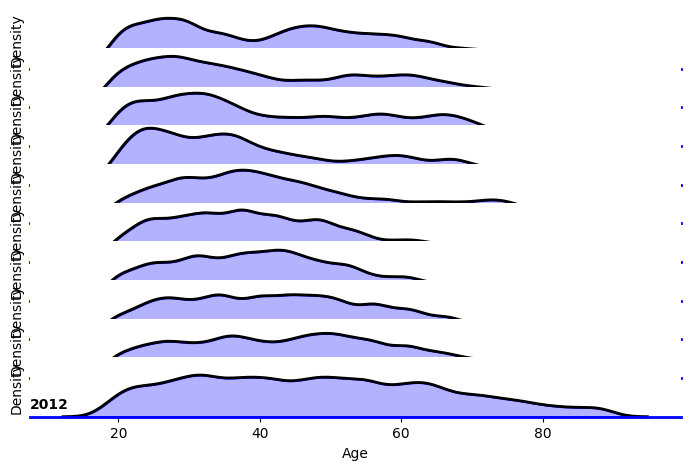

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

p = sns.FacetGrid(
    gss_lon.loc[lambda d: d['year'].isin(yrs)].assign(year=lambda d: d['year'].astype(int).astype(str)),
    row="year", hue='year', aspect=15, height=.5, palette=['blue']* 10)
p.map(sns.kdeplot, 'age',bw_adjust=.5, clip_on=False,
      fill=True, alpha=.3, linewidth=1.5)
p.map(sns.kdeplot, 'age', clip_on=False, color="black", lw=2, bw_adjust=.5)
p.map(plt.axhline, y=0, lw=2, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color='black',
            ha="left", va="center", transform=ax.transAxes)

p.map(label, "year")
p.fig.subplots_adjust(hspace=-.35)
p.set_titles("")
p.set(yticks=[])
plt.xlabel("Age")
p.despine(bottom=True, left=True)

## 図 8.20

注: **cowplot** パッケージが存在しないため, この図の Python での作成コード例はオリジナルから最もかけ離れてしまっています. 

以下の2つのプロット (`p1`, `p2`) は元のコードを真似たものです. しかしこの2つを連結し, かつ軸を共有するのは難しいです.

In [39]:
fredts_m = fredts[['date', 'sp500_i', 'monbase_i']].melt(
  id_vars='date', var_name='series', value_name='score'
)

In [40]:
p = ggplot(fredts_m, aes(x='date', y='score', group='series', color='series'))
p1 = p + geom_line() + theme(legend_position="top") + labs(
  x="Date", y="Index", color="Series")
p = ggplot(fredts, aes(x='date', y='sp500_i - monbase_i'))
p2 = p + geom_line() + labs(x="Date", y="Difference")
(p1 + theme(figure_size = (6, 3)) + scale_x_date(date_labels='%Y')).draw();
(p2 + theme(figure_size = (6, 2)) + scale_x_date(date_labels='%Y')).draw();

解決法の1つは, プロットエリアを識別する列をもう1つ作り, `facet_grid` でファセットとして分割することですが, この方法ではファセットごとの大きさを調整することはできません.

In [41]:
fredts_py = pd.concat(
  [
    fredts_m.assign(var='Index'),
    fredts.assign(
      series='Difference',
      score=lambda d: d['sp500_i'] - d['monbase_i'],
      var='Difference'
    )[['date', 'series', 'score', 'var']]
  ],
  axis=0
).assign(var=lambda d: pd.Categorical(d['var'], ['Index', 'Difference']))

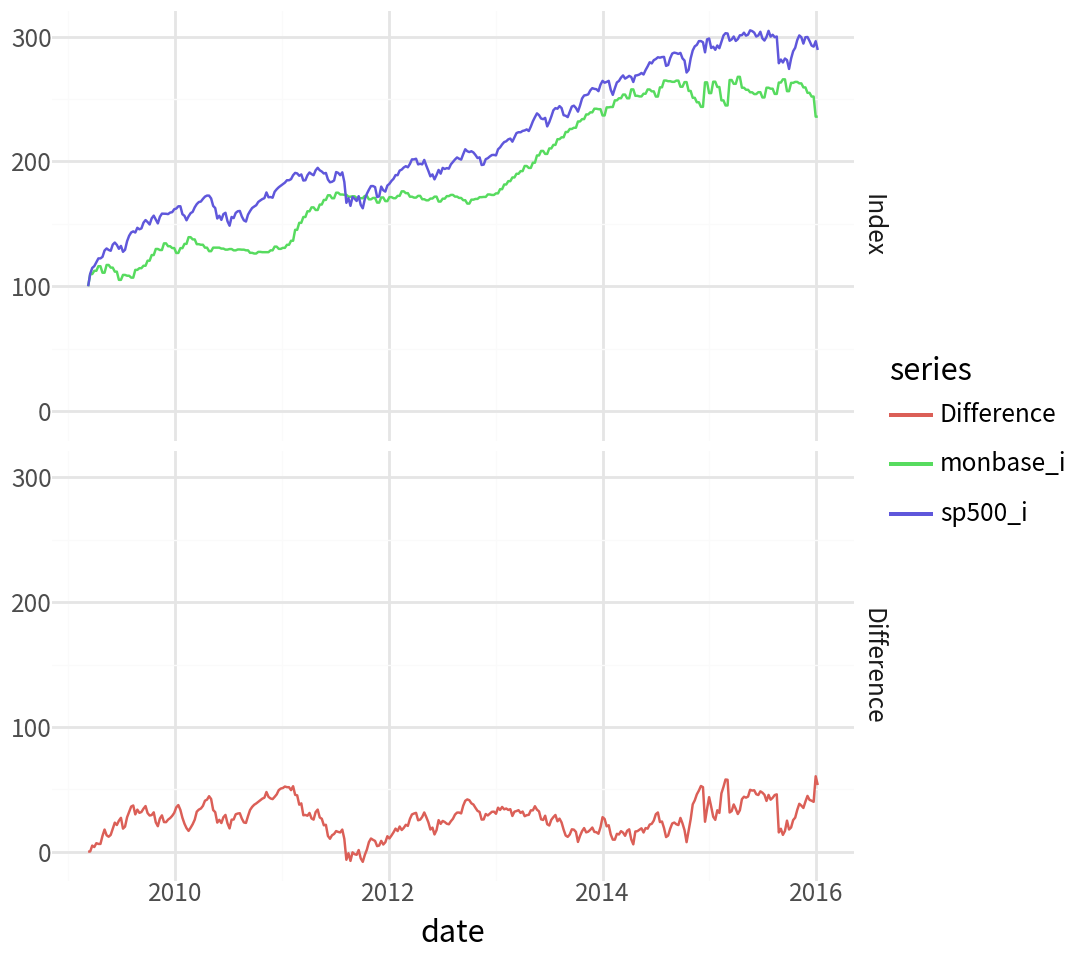

In [42]:
ggplot(
  fredts_py,
  aes(x='date', y='score', group='series', color='series')
) + geom_line(
) + facet_grid(
  'var ~ .', scales='fixed'  # or try scales='free_y'
) + theme(axis_title_y=element_blank()
) + scale_x_date(date_labels='%Y')

## 図 8.22

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/themes/themeable.py:2398: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


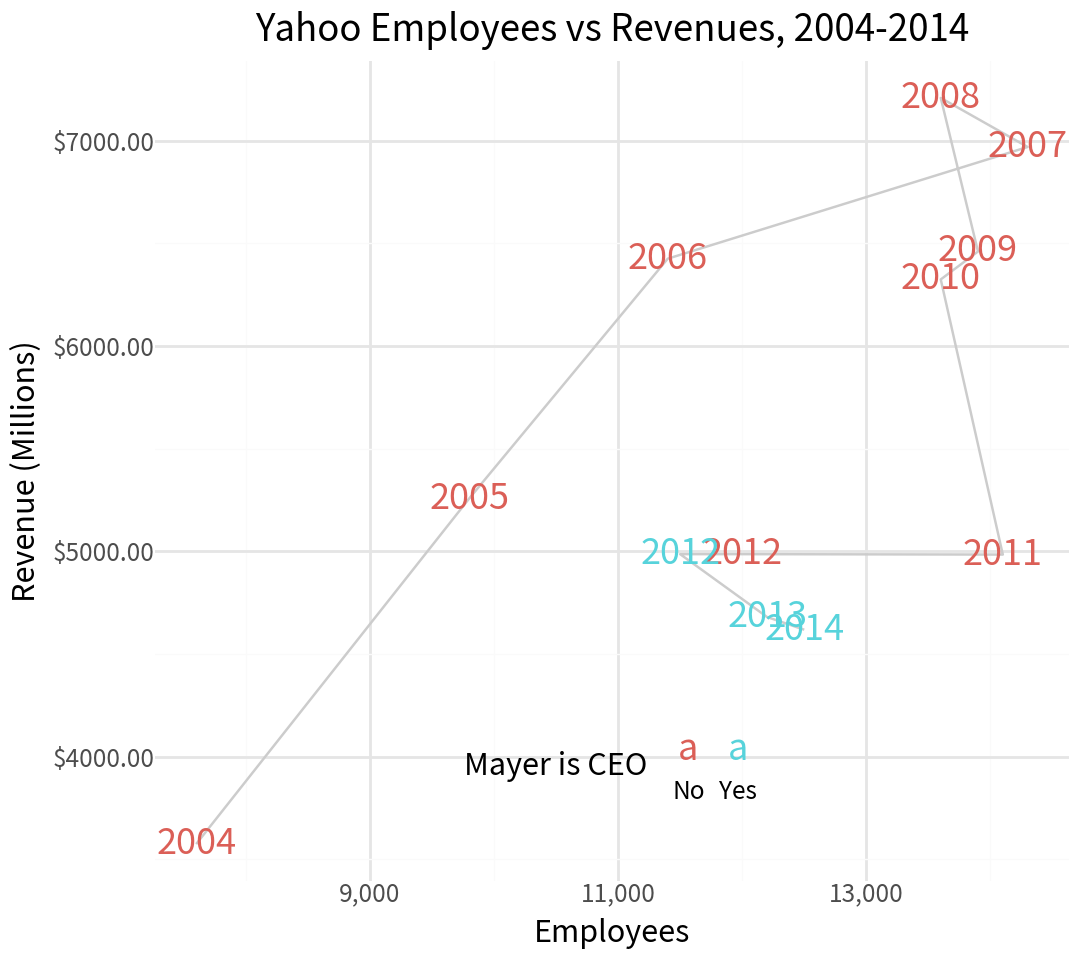

In [43]:
p = ggplot(yahoo, aes(x='Employees', y='Revenue'))
p + geom_path(
  color=dcolors["gray80"]
) + geom_text(
  aes(color='Mayer', label='Year.astype(int)'),
  size=13
  # fontface="bold"  # currently not available
) + theme(
  legend_position=(.5, .1),
  legend_direction='horizontal',
  subplots_adjust={'bottom': 0.2}
) + labs(
  color="Mayer is CEO",
  x="Employees",
  y="Revenue (Millions)",
  title="Yahoo Employees vs Revenues, 2004-2014"
) + scale_y_continuous(labels=label_dollar()
) + scale_x_continuous(labels=label_comma()
)

## 図 8.23

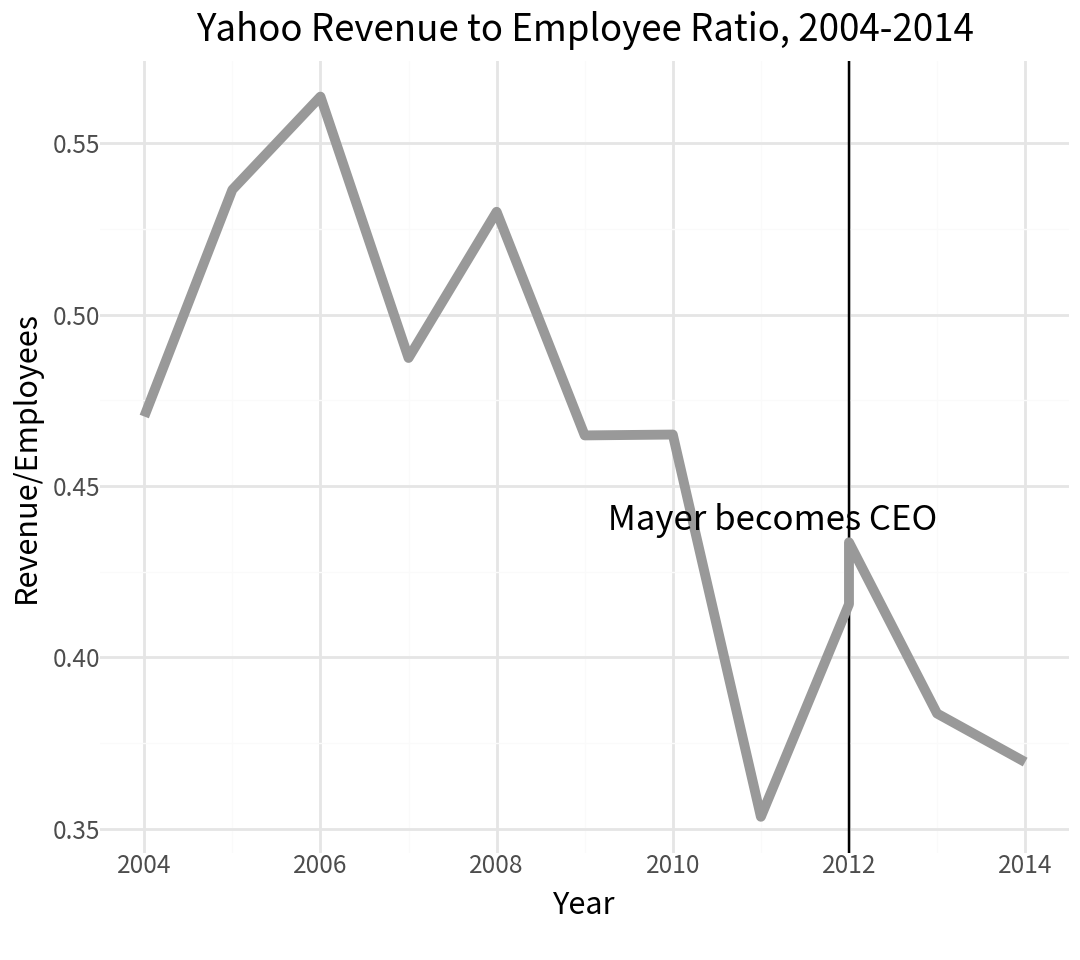

In [44]:
p = ggplot(yahoo, aes(x='Year', y='Revenue/Employees'))
p + geom_vline(xintercept=2012) + geom_line(
  color=dcolors["gray60"], size=2
) + annotate(
  "text", x=2013, y=0.44, label=" Mayer becomes CEO", size=12.5, ha="right"
) + labs(
  x="Year\n",
  y="Revenue/Employees",
  title="Yahoo Revenue to Employee Ratio, 2004-2014"
)

## 図 8.25

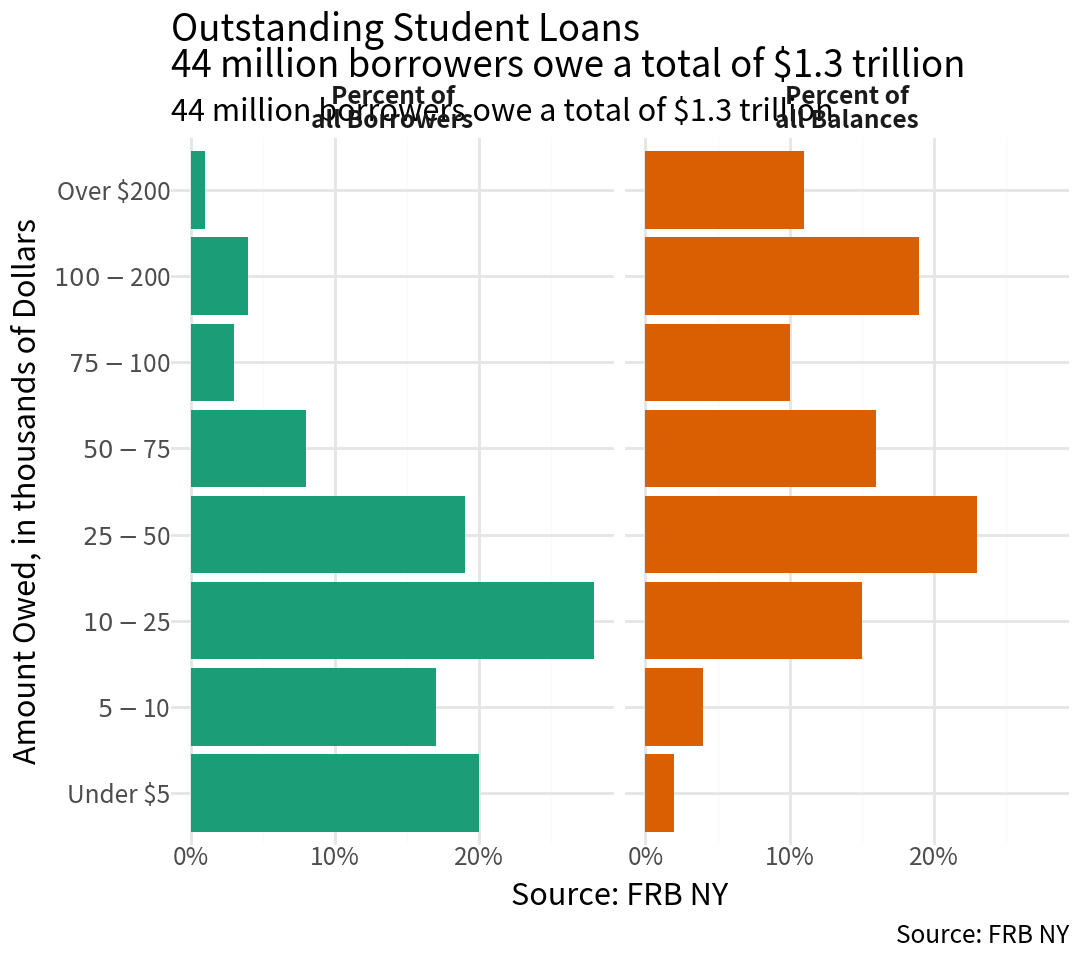

In [45]:
p_xlab = "Amount Owed, in thousands of Dollars"
p_title = "Outstanding Student Loans"
p_subtitle = "44 million borrowers owe a total of $1.3 trillion"
p_caption = "Source: FRB NY"
f_labs = dict(
  Borrowers="Percent of\nall Borrowers",
  Balances="Percent of\nall Balances"
)

p = ggplot(studebt, aes(x='Debt', y='pct/100', fill='type'))
p + geom_bar(stat="identity") + scale_fill_brewer('qual', 'Dark2'
) + scale_y_continuous(labels=label_percent()
) + guides(fill=False) + theme(
  strip_text_x = element_text(face="bold")
) + labs(
  y=p_caption, x=p_xlab,
  caption=p_caption,
  title='\n'.join([p_title, p_subtitle]),
  subtitle=p_subtitle) + facet_grid(
    '~ type', labeller=as_labeller(f_labs)
) + coord_flip()